In [65]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic")

from preprocessing import preprocess


## Predict whether a passenger survived or died in the Titanic disaster based on their attributes.

In [66]:
path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\data"
os.chdir(path)

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
rows, cols = df.shape
print(f"rows: {rows} columns: {cols}") 

rows: 891 columns: 12


In [68]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
# Categorical columbs
print(df['Survived'].value_counts(normalize=True))
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
print(df['Pclass'].value_counts())


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


* Missing Values: Age (177 missing), Cabin (687 missing), Embarked (2 missing).
* Data Types: Mix of numerical (int64, float64) and categorical (object) features.
* Key Columns: Survived (target), Pclass, Sex, Age, Fare.
* Pclass: Categorical (1, 2, 3)
* SibSp Meaning: Number of siblings or spouses aboard.Sibling = brother, sister, stepbrother, stepsister & Spouse = husband, wife (mistresses ignored)
* Parch Meaning: Number of parents or children aboard.Parent = mother, father & Child = son, daughter, stepchild
* Embarked:  Categorical (S, C, Q) Meaning: Port where the passenger boarded:S = Southampton (England),C = Cherbourg (France), Q = Queenstown (Ireland)
* Survived	✅ Target column	What we’re predicting.



# 2. Data Cleaning

In [73]:
#Checking the total sum of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [74]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


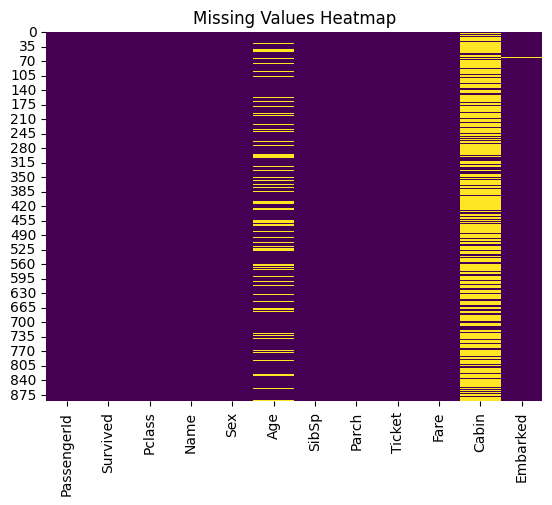

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

* Cabin has too many missing values (77%), so dropping it may be best.

* Age has ~20% missing, so imputation (median) is better.

* Embarked has only 2 missing rows, so we can fill with mode.

In [76]:
# Making a copy of the data so as to retain the original dataframe
df2 = df.copy()

In [77]:
# Imputing missing values with median for the 'Age' column
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

# Imputing 2 missing values in 'Embarked' with mode
df2['Embarked'] = df2['Embarked'].fillna(df2['Age'].mode()[0])

# Drop Cabin (too many missing values)
df2.drop('Cabin', axis=1, inplace=True)

In [78]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* We have imputed all missing values now our datais clean and contains no noise.

# 3. Exploratory Data Analysis

###  Overall Survival Rate

In [79]:
import plotly.express as px

fig = px.pie(df, names='Survived', title='Overall Survival Rate (0 = Died, 1 = Survived)',
             color='Survived', hole= 0.3, color_discrete_map={0: 'red', 1: 'brightgreen'})
fig.update_traces(textinfo='percent+label') 
fig.update_layout(
    width=600,
    height=400,
)
fig.show()

Only 38.4% survived (Meaning we have an imbalanced dataset).



### Categorical Features vs. Survival

In [80]:
fig = px.histogram(
    df2,
    x="Sex",
    color="Sex",
    title="Survival Rate by Sex",
    color_discrete_map={"male": "skyblue", "female": "salmon"},
    barmode="group"
)

# Update layout to mimic the original seaborn look
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Gender distribution",
    yaxis_title="Count",
    bargap=0.2
)

fig.show()


* 74.2% of females survived vs. 18.9% of males 

In [81]:
import plotly.express as px
import pandas as pd

# Calculate survival rate by class
survival_rate = (
    df2[df2['Survived'] == 1].groupby('Pclass').size() / df2.groupby('Pclass').size()
).reset_index(name='Survival Rate')

# Convert to percentage
survival_rate['Survival Rate'] *= 100

# Plotly bar chart
fig = px.bar(
    survival_rate,
    x='Pclass',
    y='Survival Rate',
    color='Pclass',
    title='Survival Rate by Class',
    text='Survival Rate',
    color_discrete_map={1: 'salmon', 2: 'gray', 3: 'skyblue'}
)

# Beautify layout
fig.update_layout(
    width=800,
    height=400,
    xaxis_title="Titanic Classes",
    yaxis_title="Survival Rate (%)",
    showlegend=False
)

# Format bar text
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.show()


In [82]:
import sys
print(sys.executable)

C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


* 1st class (63%) > 2nd class (47%) > 3rd class (24%) → Wealthier passengers had priority.

In [83]:
# Filter only survivors
survivors = df[df['Survived'] == 1]

# Count survivors by Embarked port
survivors_by_port = survivors['Embarked'].value_counts().reset_index()
survivors_by_port.columns = ['Embarked', 'Count']

# Plot
fig = px.bar(
    survivors_by_port,
    x='Embarked',
    y='Count',
    color='Embarked',
    title='Survivors by Embarkation Port',
    color_discrete_map={
        'C': '#8B0000',     # Dark red
        'Q': '#4682B4',     # Steel blue
        'S': '#2F4F4F'      # Dark slate gray
    }
)

fig.update_layout(
    width=800,
    height=400,
    xaxis_title='Embarked Port',
    yaxis_title='Number of Survivors',
    bargap=0.2,
    showlegend=False
)

fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()

* People who boarded from port (S), had the most survivors 217, unlike pople who boarded in port(Q) → Likely more 1st-class passengers boarded there.

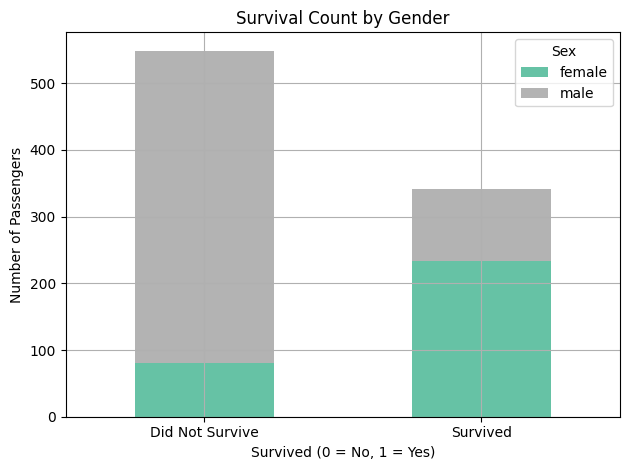

In [84]:
grouped = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, colormap='Set2')

# Formatting
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()


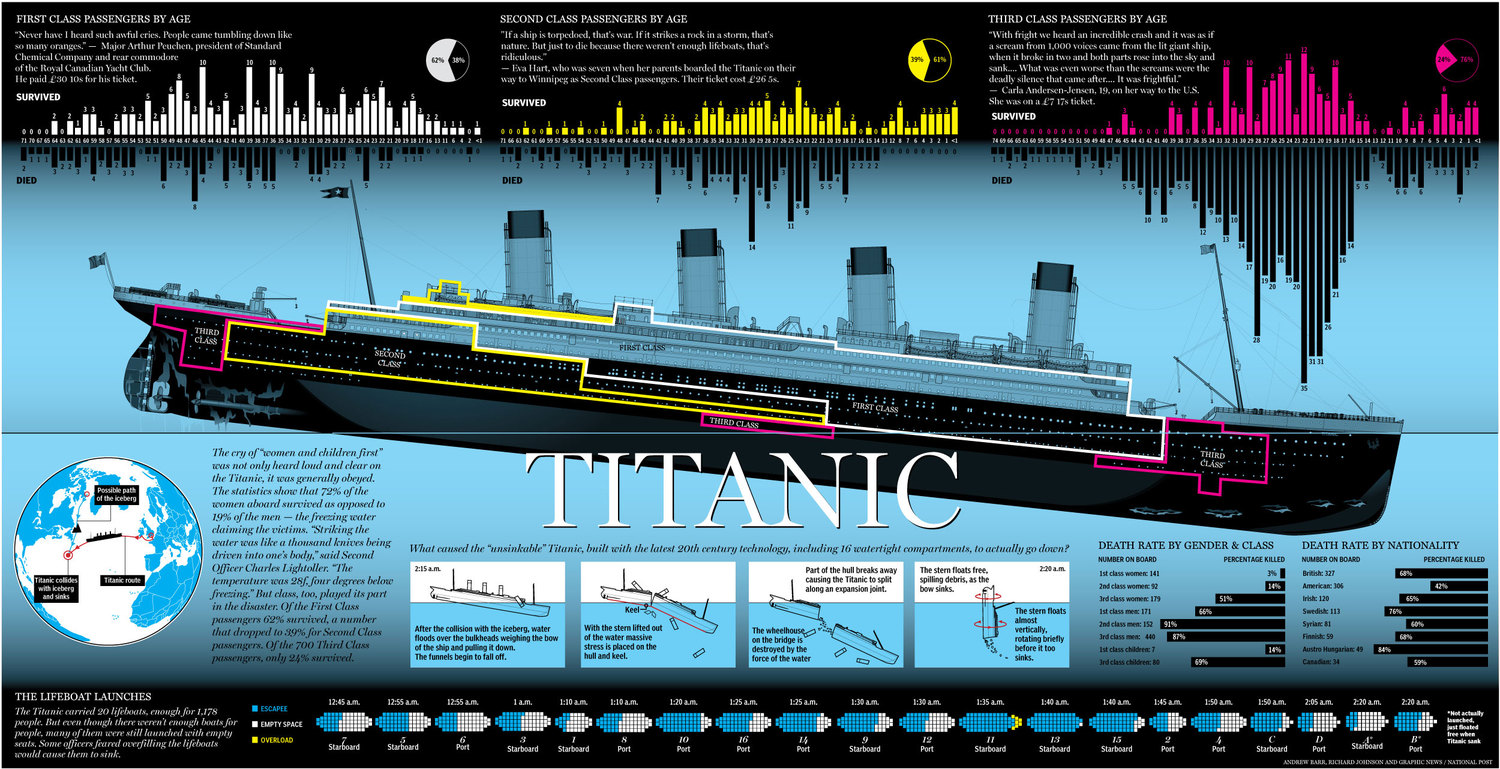

In [85]:
from IPython.display import Image


Image(filename="C:/Users/USER/Downloads/TItanic-Survival-Infographic.jpg")

In [86]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# DATA PREPROCESSING

In [87]:
print(df2['Sex'].unique().tolist())

['male', 'female']


In [ ]:
from sklearn.preprocessing import FunctionTransformer

def preprocess(df2):
    # Family size category
    df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
    df2['FamilySizeCategory'] = df2['FamilySize'].apply(
        lambda x: 0 if x == 1 else 1 if x <= 4 else 2
    )

    # Age category (assuming no missing values)
    df2['AgeCategory'] = df2['Age'].apply(
        lambda x: 0 if x < 18 else 1 if x < 60 else 2
    )

    # Encode Sex
    if df2['Sex'].dtype == object:
        df2['Sex'] = df2['Sex'].str.strip().str.lower().map({'male': 0, 'female': 1})

    # One-hot encode Embarked (assuming no missing values)
    df2 = pd.get_dummies(df2, columns=['Embarked'], prefix='Embarked')
    # Ensure all expected embarked columns exist
    for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
        if col not in df2:
            df2[col] = 0

    # Drop unused columns
    drop_cols = ['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'FamilySize']
    if 'Title' in df2.columns:
        drop_cols.append('Title')
    df2.drop(columns=[c for c in drop_cols if c in df2.columns], inplace=True)

    # Return columns in consistent order
    expected_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySizeCategory', 
                    'AgeCategory', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
    
    # Add any missing columns with 0 (safety check)
    for col in expected_cols:
        if col not in df2.columns:
            df2[col] = 0
            
    return df2[expected_cols]

preprocessor = FunctionTransformer(preprocess)


In [ ]:
# My new df after encoding features
processed_df = preprocess(df2)

processed_df.head()

,Pclass,Sex,Age,Fare,FamilySizeCategory,AgeCategory,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,7.2500,1,1,False,False,True
1,1,1,38.0,71.2833,1,1,True,False,False
2,3,1,26.0,7.9250,0,1,False,False,True
3,1,1,35.0,53.1000,1,1,False,False,True
4,3,0,35.0,8.0500,0,1,False,False,True


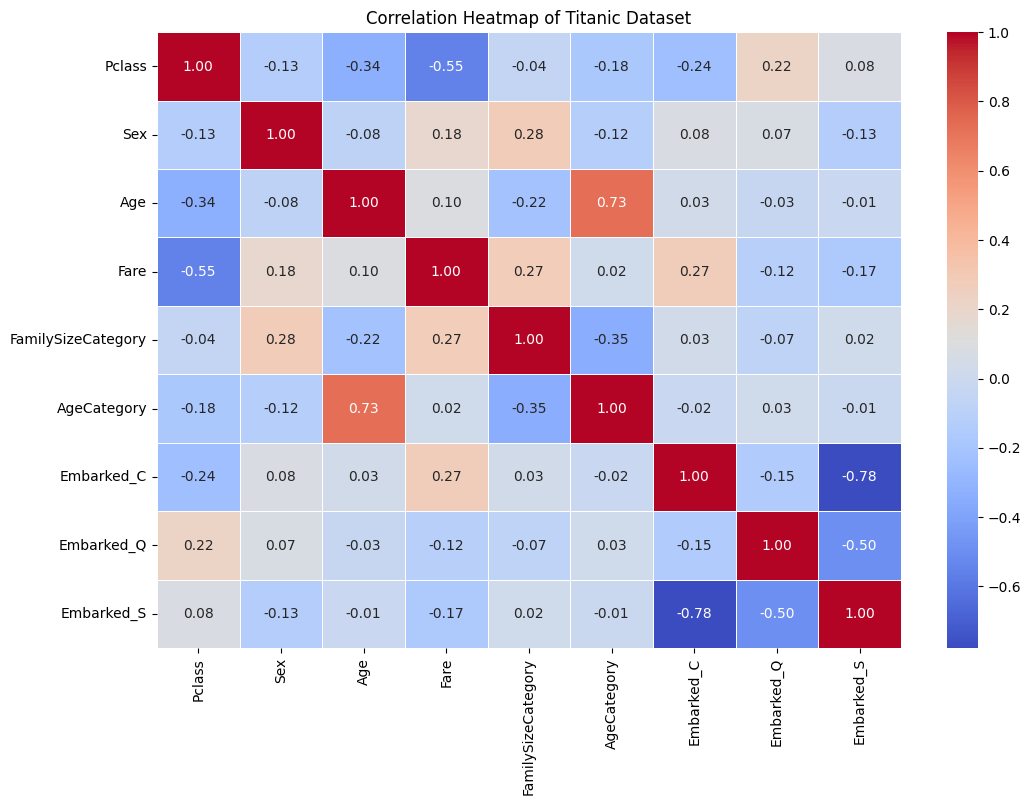

In [90]:
# Visualizing a heatmap of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(processed_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

# Model Training

In [91]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize',
       'FamilySizeCategory', 'AgeCategory'],
      dtype='object')

In [92]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df2.drop('Survived', axis=1)
y = df2['Survived']

# --- THIS IS THE CRUCIAL STEP ---
# Split data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)

# 1. Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
# Correct pipeline structure
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your function
    ('classifier', RandomForestClassifier(random_state=11, class_weight='balanced'))
])


# Define a more focused parameter grid 
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 5],
    'classifier__max_depth': [10, 20, None],
    'classifier__bootstrap': [True]
}

# Perform Grid Search ONLY on the training data
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # Cross-validation is performed on the training set
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_raw, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        FunctionTransformer(func=<function preprocess at 0x000001D745A99DA0>)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=11))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__max_depth': [10, 20, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

--- Model Evaluation on Unseen Test Data ---
Best parameters found: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best cross-validation accuracy on training data: 0.8221
Test set accuracy: 0.8237

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       192
           1       0.81      0.71      0.76       120

    accuracy                           0.82       312
   macro avg       0.82      0.80      0.81       312
weighted avg       0.82      0.82      0.82       312



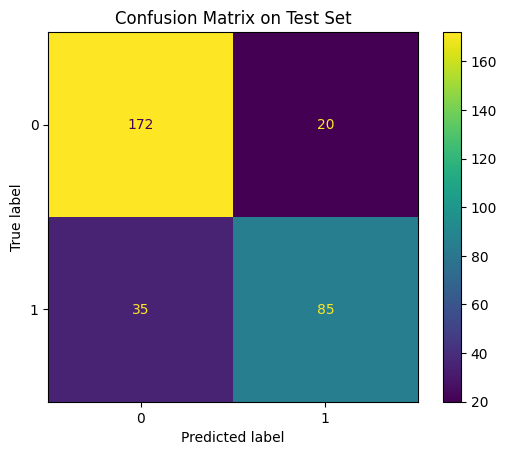

In [94]:
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay)
# Evaluate the Best Model on the Test Set 
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test_raw)
accuracy = accuracy_score(y_test, y_pred)

print("--- Model Evaluation on Unseen Test Data ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy on training data: {grid_search.best_score_:.4f}")
print(f"Test set accuracy: {accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix on Test Set")
plt.show()

# 2. Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
# Build pipeline
logistic_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=11, max_iter=10000))
])

# Define parameter grid for Logistic Regression
log_reg_param_grid = { 
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['liblinear', 'saga']  # solvers that support L1/L2
}

# GridSearchCV setup
log_reg_grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=log_reg_param_grid,
    scoring='accuracy',
    cv=50,
    n_jobs=-1,
    verbose=1
)

# Fit on training data (raw)
log_reg_grid_search.fit(X_train_raw, y_train)



Fitting 50 folds for each of 32 candidates, totalling 1600 fits


GridSearchCV(cv=50,
             estimator=Pipeline(steps=[('preprocessing',
                                        FunctionTransformer(func=<function preprocess at 0x000001D745A99DA0>)),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=11))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__class_weight': ['balanced', None],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)


✅ Logistic Regression Test Accuracy: 0.7821
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       192
           1       0.75      0.64      0.69       120

    accuracy                           0.78       312
   macro avg       0.78      0.76      0.76       312
weighted avg       0.78      0.78      0.78       312



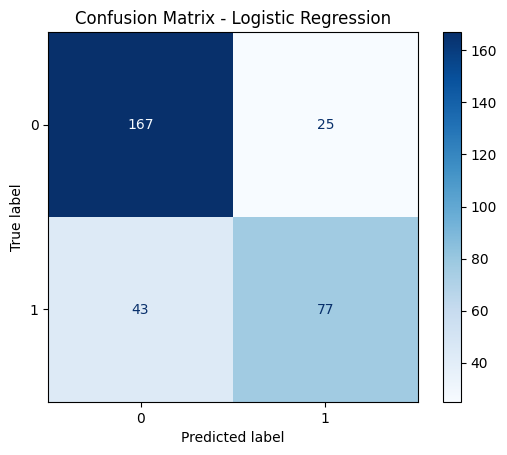

✅ Logistic Regression ROC AUC Score: 0.8357


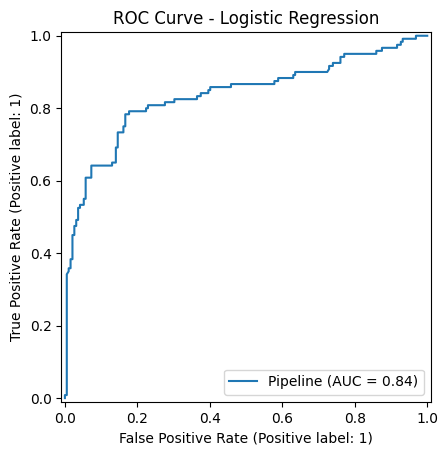

In [ ]:
# Best estimator and evaluation
best_logistic_model = log_reg_grid_search.best_estimator_

# Predictions on test set
y_pred_log = best_logistic_model.predict(X_test_raw)

# Evaluation
print(f"\n✅ Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("✅ Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=best_logistic_model.classes_)
disp_log.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Optional: ROC Curve and AUC
if len(set(y_test)) == 2:
    y_prob_log = best_logistic_model.predict_proba(X_test)[:, 1]
    auc_log = roc_auc_score(y_test, y_prob_log)
    print(f"✅ Logistic Regression ROC AUC Score: {auc_log:.4f}")
    RocCurveDisplay.from_estimator(best_logistic_model, X_test, y_test)
    plt.title("ROC Curve - Logistic Regression")
    plt.show()


# Model Deployment

In [ ]:
# Save the model
model_path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\best_rf_model.pkl"

import joblib

joblib.dump(pipeline, model_path)  # Save entire pipeline
print(f"Model saved at: {model_path}")

Model saved at: C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\best_rf_model.pkl


In [ ]:
import os

print("Current folder contents:")
print(os.listdir(r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic"))


Current folder contents:
['.git', 'best_rf_model.pkl', 'Cleaning', 'data', 'preprocessing.py', 'streamlit_app.py', 'titanic.ipynb', 'Titanic1.ipynb', 'utils.py', '__pycache__']


In [ ]:
!pip install joblib



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
